In [2]:
%matplotlib inline
import os
import numpy as np
import pandas
import matplotlib.pyplot as plt


Vamos a cargar un conjunto de datos con la función `read_csv` de pandas:

In [3]:
df = pandas.read_csv('data/index_html.csv')
df.keys()

Index(['seconds'], dtype='object')

(0.0, 70.0)

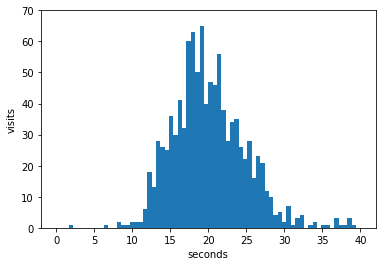

In [4]:
_ = plt.hist(df['seconds'], bins=70, range=[0, 40])
plt.xlabel('seconds')
plt.ylabel('visits')
plt.ylim([0, 70])

In [5]:
df_caramelo = pandas.read_csv('data/caramelo_html.csv')
df_caramelo.keys()

Index(['seconds'], dtype='object')

El criterio que deberíamos usar para identificar las páginas scrapeadas de las que no lo són es el de observar 2 o más modas, siendo una de ellas claramente de muy corta duración. Un ser humano normal tarda un cierto tiempo en leer una página web mientras que un scrapeo debería ser muy homogeneo.

Vamos a intentar observar este fenómeno con los datos que tenemos. Evidentemente en el index no hay información interesante.

## CARAMELOS

(0.0, 70.0)

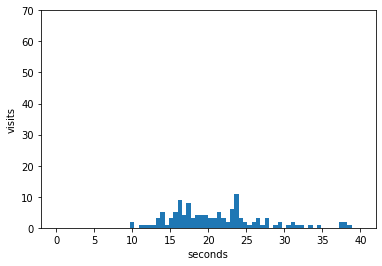

In [6]:
_ = plt.hist(df_caramelo['seconds'], bins = 70, range = (0, 40,))
plt.xlabel('seconds')
plt.ylabel('visits')
plt.ylim([0, 70])

Aquí se aprecian varias modas. La que más me llama la atención sería el grupo de menos de 15 segundos, que está muy diferenciado del resto, pero esto no está nada claro que signifique que es por bots. Los tiempos son demasiado altos.

## CHICLE

In [7]:
df_chicle = pandas.read_csv('data/chicle_html.csv')
df_chicle.keys()

Index(['seconds'], dtype='object')

(0.0, 70.0)

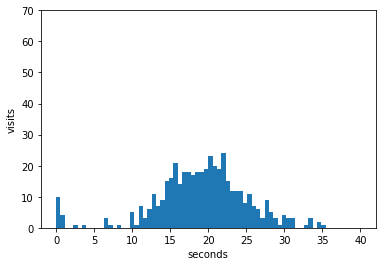

In [8]:
_ = plt.hist(df_chicle['seconds'], bins = 70, range = (0, 40,))
plt.xlabel('seconds')
plt.ylabel('visits')
plt.ylim([0, 70])

Otra vez podemos apreciar una moda con muy pocos segundos. Esto me indica que tiene pinta de ser un bot, muy claramente ya que hay muchas visitas así.

## LOLLIPOP

In [9]:
df_lollipop = pandas.read_csv('data/lollipop_html.csv')
df_lollipop.keys()

Index(['seconds'], dtype='object')

(0.0, 70.0)

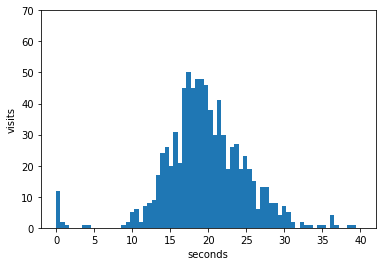

In [10]:
_ = plt.hist(df_lollipop['seconds'], bins = 70, range = (0, 40,))
plt.xlabel('seconds')
plt.ylabel('visits')
plt.ylim([0, 70])

De nuevo un grupo con menos de 5 segundos, que indica la visita de un bot.

## MARSHMALLOW

In [11]:
df_marshmallow = pandas.read_csv('data/marshmallow_html.csv')
df_marshmallow.keys()

Index(['seconds'], dtype='object')

(0.0, 70.0)

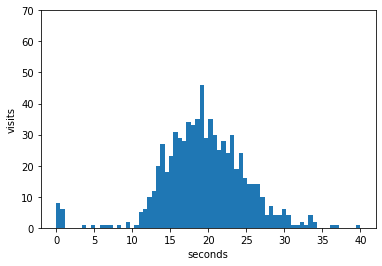

In [12]:
_ = plt.hist(df_marshmallow['seconds'], bins = 70, range = (0, 40,))
plt.xlabel('seconds')
plt.ylabel('visits')
plt.ylim([0, 70])

Otra vez se observa una moda de visitas con muy pocos segundos de duración, que indica un bot.

## SUGUS

In [13]:
df_sugus = pandas.read_csv('data/sugus_html.csv')
df_sugus.keys()

Index(['seconds'], dtype='object')

(0.0, 70.0)

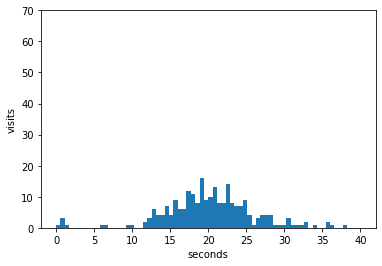

In [14]:
_ = plt.hist(df_sugus['seconds'], bins = 70, range = (0, 40,))
plt.xlabel('seconds')
plt.ylabel('visits')
plt.ylim([0, 70])

Apreciamos aquí también varias visitas con menos de 5 segundos que es otro indicio muy claro de bot.

## GLOBAL

Intentaremos representar todas las gráficas al mismo tiempo con los 5 primeros segundos ya que hemos detectado que esa es la franja en la que se mueven los bots.

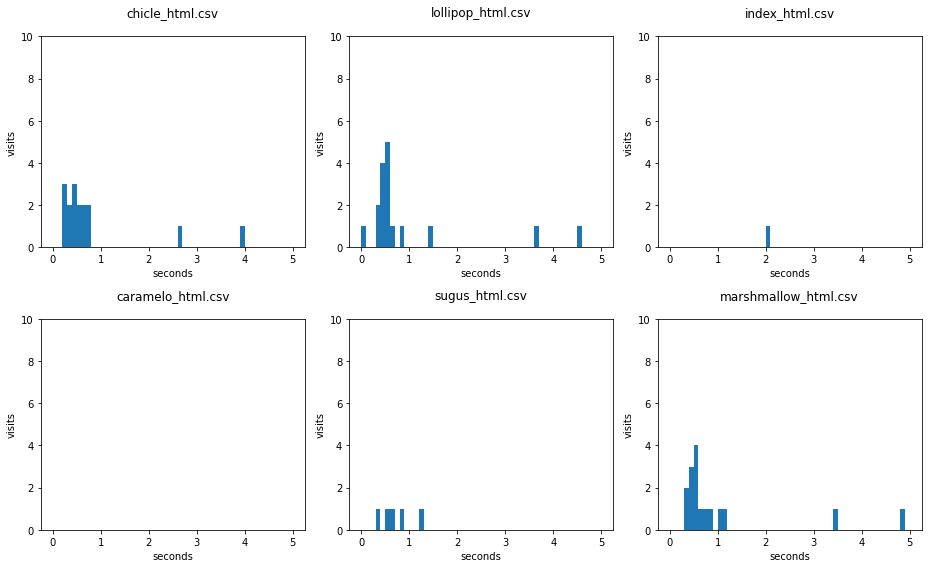

In [15]:
pages = os.listdir('data/')
figure, axes = plt.subplots(nrows=2, ncols=3, figsize=(13, 8,))

for i, axe in enumerate(axes.flatten()):
    page = pages[i]
    
    csv_path = "data/{0}".format(page)
    df = pandas.read_csv(csv_path)
    
    axe.hist(df['seconds'], bins=50, range=[0, 5])
    
    axe.set_title(label=page, pad=20)
    axe.set_xlabel("seconds")
    axe.set_ylabel("visits")
    axe.set_ylim([0, 10])

figure.tight_layout()

_ = plt.show()

## Programa para detectar posibles scrapeos

podemos escribir un programa que, dado un array de tiempos de permanencia, devuelva True si está siendo scrapeada y False en otro caso?

In [19]:
MIN_NUMBER_OF_VISITS = 3
MAX_VISIT_EXPRESS_DURATION_IN_SECONDS = 3


def is_page_scrapped(visits):
    visits_express = list(filter(is_visit_express, visits))
    return len(visits_express) >= MIN_NUMBER_OF_VISITS


def is_visit_express(duration):
    return duration < MAX_VISIT_EXPRESS_DURATION_IN_SECONDS


for page in pages:
    csv_path = "data/{0}".format(page)
    df = pandas.read_csv(csv_path)
    
    scrapped = is_page_scrapped(df['seconds'])
    
    print("{0}: {1}".format(page, scrapped))

chicle_html.csv: True
lollipop_html.csv: True
index_html.csv: False
caramelo_html.csv: False
sugus_html.csv: True
marshmallow_html.csv: True


## Porcentajes apróximados de bots

Para poder hacernos una idea a simple vista de cual es el porcentaje de bots que visitan las páginas, una de las mejores gráficas que podemos representar sería el de barras acumuladas.

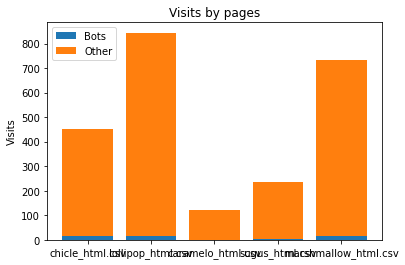

In [46]:
BOT_SECONDS_DURATION = 5

def is_bot(seconds):
    return seconds <= BOT_SECONDS_DURATION


def get_bot_visits(visits):
    return len(list(filter(is_bot, visits)))


labels = []
len_bots = []
len_other = []

for page in pages:
    if page != "index_html.csv":
        csv_path = "data/{0}".format(page)
        df = pandas.read_csv(csv_path)
        bot_visits = get_bot_visits(df['seconds'])
        other_visits = len(df['seconds']) - bot_visits

        labels.append(page)
        len_bots.append(bot_visits)
        len_other.append(other_visits)
    
width = 0.80

fig, ax = plt.subplots()

ax.bar(labels, len_bots, width, label='Bots')
ax.bar(labels, len_other, width, bottom=len_bots,
       label='Other')

ax.set_ylabel('Visits')
ax.set_title('Visits by pages')
ax.legend()

plt.show()

Aquí se puede observar que el porcentaje por visitas de bots es muy pequeño, no llegando ni al 5%.

## CONCLUSIONES

1. Las páginas scrappeadas son: chicle, lollipop, marshmallow y sugus. Usamos como criterio el de identificar una moda que tenga muy pocos segundos de duración.
2. Para estimar a mano el número apróximado de visitas de bots debemos crear una gráfica que muestre visitas de bot y visitas normales a escala. En este caso vemos que hay muy pocas visitas de bots.